Question1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import os
from tqdm import tqdm
import copy
from typing import Dict, List, Optional, Set, Tuple
import pandas as pd
import random

1.1

In [110]:
Gba = nx.barabasi_albert_graph(1000,2)

In [3]:
def one_step_simulation(graph, beta, delta, state, rg):
    """
    Simulate one step of the SIS model.
    """
    new_state = state.copy()
    for i in range(graph.number_of_nodes()):
        if state[i] == 1:
            j = list(graph.neighbors(i))
            change = (rg.rand(len(j)) < beta).astype(int)
            new_state[j] = state[j] | change
            new_state[i] = 0 if rg.rand() < delta else 1
    return new_state


def simulate_SIS(graph, beta=0.2, delta=0.2, infected=[0], max_time=500, seed=10):
    """
    Simulate the SIS model with the given parameters.
    """
    N = max(graph.nodes()) + 1
    rg = np.random.RandomState(seed)
    # Initialize the state vector
    state = np.zeros(N, dtype=int)
    for i in infected:
        state[i] = 1

    # simulate max_time steps
    states = [state]
    for i in tqdm(range(max_time)):
        state = one_step_simulation(graph, beta, delta, state, rg)
        states.append(state)
    return states


def read_edge_list(file_path):
    with open(file_path, "r") as f:
        lines = f.readlines()
    graph = nx.Graph()
    for line in lines:
        u, v = line.split()
        graph.add_edge(int(u), int(v))
    return graph

In [129]:
#run 200 rounds with full network
round = 200
s200=[]
i200=[]
ifull200 = []
for i in range(round):
    state=simulate_SIS(graph=Gba,beta=0.2, delta=0.2, max_time = 500, infected = list(Gba),seed = random.randint(0,1000))
    s200.append([])
    i200.append([])
    for idx in range(500):
        s200[-1].append(np.count_nonzero(state[idx] == 0))
        i200[-1].append(np.count_nonzero(state[idx] == 1))
    #ifull200.append(ans)

sis_out = pd.DataFrame({"t":list(range(1,501)),"S":[sum(x)/round for x in zip(*s200)],"I":[sum(x)/round for x in zip(*i200)]})

100%|███████████████████████████████████████████████████████████████████████████████| 500/500 [00:03<00:00, 143.73it/s]


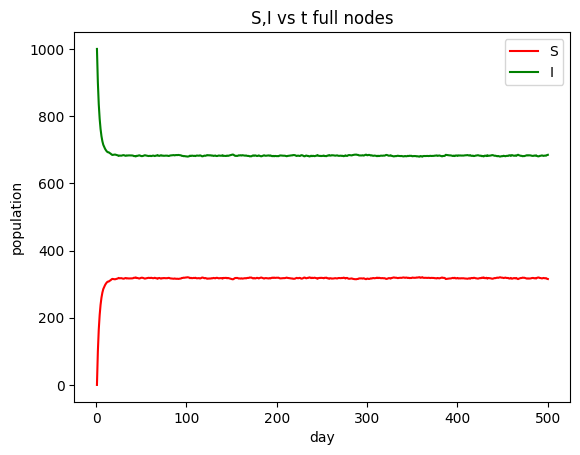

In [130]:
plt.plot('t','S', color='red', data=sis_out)
plt.plot('t','I', color='green',data=sis_out)
plt.title("S,I vs t full nodes")
plt.xlabel('day')
plt.ylabel('population')
legend=plt.legend()
plt.savefig('1.3.1.png')

In [131]:
sis_out['I'].tolist()

[1000.0,
 900.82,
 835.465,
 792.135,
 761.65,
 740.365,
 725.34,
 714.73,
 708.46,
 702.66,
 698.28,
 694.715,
 692.58,
 692.375,
 690.215,
 688.62,
 686.25,
 684.44,
 684.76,
 685.28,
 685.67,
 684.925,
 684.515,
 683.27,
 681.57,
 682.645,
 682.47,
 682.27,
 683.095,
 683.8,
 683.595,
 682.45,
 681.81,
 683.165,
 682.565,
 683.125,
 683.065,
 683.305,
 683.215,
 682.885,
 682.33,
 681.0,
 681.255,
 680.095,
 681.935,
 681.68,
 682.825,
 683.32,
 682.34,
 681.14,
 680.96,
 681.585,
 682.59,
 683.565,
 682.905,
 682.52,
 681.855,
 681.235,
 681.64,
 681.855,
 681.09,
 681.78,
 682.455,
 682.145,
 681.065,
 682.255,
 682.5,
 684.035,
 682.34,
 681.59,
 682.52,
 683.705,
 682.155,
 682.56,
 681.875,
 682.195,
 682.41,
 682.435,
 682.325,
 681.455,
 681.675,
 682.87,
 683.09,
 683.215,
 683.8,
 683.98,
 683.175,
 683.96,
 684.135,
 683.94,
 684.46,
 683.985,
 683.305,
 683.24,
 681.68,
 681.605,
 680.785,
 681.035,
 680.43,
 680.21,
 679.645,
 679.895,
 680.53,
 682.275,
 681.255,
 682.3

1.2

In [132]:
from typing import List
def sample_nodes(G, num_nodes, rng: np.random.RandomState):
    nodes = list(G.nodes)
    return rng.choice(nodes, num_nodes, replace=False)


def sample_neighbors(
    G: nx.Graph, num_nodes: int, rng: np.random.RandomState
) -> np.ndarray | List[int]:
    nodes = list(G.nodes)
    rand_nodes = rng.choice(nodes, num_nodes, replace=False)
    return [rng.choice(list(G.neighbors(node))) for node in rand_nodes]


def remove_nodes_from_graph(G: nx.Graph, nodes):
    G.remove_nodes_from(nodes)
    return G

In [133]:
random_nodes = sample_nodes(Gba,100,np.random)
friend_nodes = sample_neighbors(Gba,100,np.random)
print("random nodes chosen:\n",random_nodes,"\nfriend nodes chosen:\n",friend_nodes)

random nodes chosen:
 [930 521 582 537 590 134   1 445 620 297 305 821  99 740 850 917 633 694
 418 524 426  20 638 608 299 703 628 519 417 236 616 432 230 648 311 874
 194 530 291 880 249 842  84 190 879 832 710 451 293 924 599 677 125 989
 847 968 660 884 466 845 424 705 553 222 198 982 458 317  13 822 912 472
 848  82 706 350 491 378 867 485  74 934 154 739  72 954 640 196 441 580
 556 526  41  32 477 862  61  39 233 803] 
friend nodes chosen:
 [56, 477, 50, 977, 252, 185, 402, 936, 146, 665, 171, 4, 136, 21, 470, 288, 198, 464, 635, 10, 128, 354, 876, 542, 95, 440, 996, 810, 15, 243, 201, 79, 888, 824, 43, 18, 627, 46, 256, 712, 112, 1, 582, 82, 677, 559, 17, 506, 641, 52, 227, 163, 4, 51, 420, 33, 54, 244, 609, 171, 4, 3, 42, 919, 14, 64, 115, 98, 573, 444, 187, 171, 1, 146, 800, 90, 8, 32, 693, 2, 61, 44, 51, 39, 41, 139, 210, 524, 459, 49, 3, 44, 314, 841, 7, 53, 187, 987, 15, 10]


1.3

In [134]:
H = Gba.copy()
J = Gba.copy()
Gba_norandom = remove_nodes_from_graph(J,random_nodes)
Gba_nofriend = remove_nodes_from_graph(H,friend_nodes)

In [135]:
round = 200
s200=[]
i200=[]
for i in range(round):
    state=simulate_SIS(graph=Gba_norandom,beta=0.2, delta=0.2, max_time = 500, infected = list(Gba_norandom),seed = random.randint(0,1000))
    s200.append([])
    i200.append([])
    for idx in range(500):
        s200[-1].append(np.count_nonzero(state[idx] == 0))
        i200[-1].append(np.count_nonzero(state[idx] == 1))
sis_out_norandom = pd.DataFrame({"t":list(range(1,501)),"S":[sum(x)/round for x in zip(*s200)],"I":[sum(x)/round for x in zip(*i200)]})

100%|███████████████████████████████████████████████████████████████████████████████| 500/500 [00:02<00:00, 178.75it/s]


In [136]:
round = 200
s200=[]
i200=[]
for i in range(round):
    state=simulate_SIS(graph=Gba_nofriend,beta=0.2, delta=0.2, max_time = 500, infected = list(Gba_nofriend),seed = random.randint(0,1000))
    s200.append([])
    i200.append([])
    for idx in range(500):
        s200[-1].append(np.count_nonzero(state[idx] == 0))
        i200[-1].append(np.count_nonzero(state[idx] == 1))
sis_out_nofriend = pd.DataFrame({"t":list(range(1,501)),"S":[sum(x)/round for x in zip(*s200)],"I":[sum(x)/round for x in zip(*i200)]})

100%|███████████████████████████████████████████████████████████████████████████████| 500/500 [00:02<00:00, 201.22it/s]


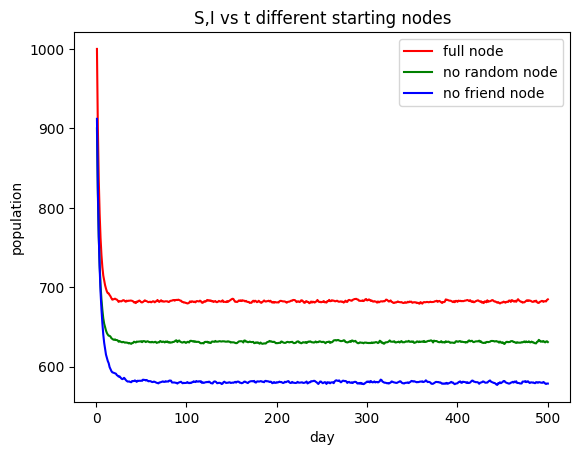

In [138]:
my_label=['full node','no random node','no friend node']
plt.plot('t','I', color='red', data=sis_out)
plt.plot('t','I', color='green',data=sis_out_norandom)
plt.plot('t','I', color='blue',data=sis_out_nofriend)
plt.title("S,I vs t different starting nodes")
plt.xlabel('day')
plt.ylabel('population')
legend=plt.legend(labels=my_label)
plt.savefig('1.3.png')

1.4

The performance of infection count without friend is slightly lower than the infection count without random nodes and greatly lower thant the infection count with full nodes, so as to say removing the friend nodes is more effective than removing random nodes from the whole graph on slowing down transmission. In another word, the importance of nodes in friend strategy is greater than the ones in random strategy.